In [88]:
#load library
%matplotlib inline
import pandas as pd

### Loading and Viewing Data Set

In [89]:
data=pd.read_csv('food_truck.txt')

In [90]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [91]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [92]:
data[data['Profit']>24].head()

,Population,Profit
29,22.203,24.147


### correlation matrix

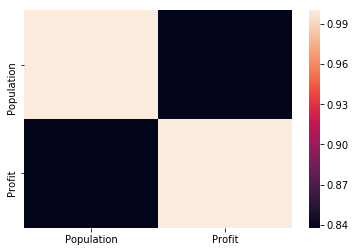

In [93]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [94]:
corr

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


### Plotting and Visualizing Data

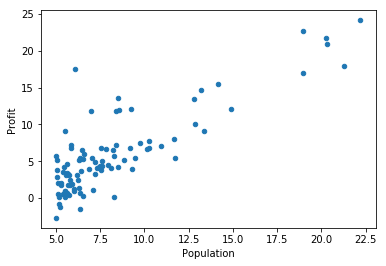

In [95]:
data.plot(x='Population',y='Profit',kind='scatter')

### Model Fitting, Optimizing, and Predicting

In [96]:
from sklearn import linear_model

In [97]:
from sklearn.model_selection import train_test_split

#####  Split train and test set

In [98]:
train,test = train_test_split(data, test_size=0.2, random_state=42)

In [99]:
train.shape

(77, 2)

In [100]:
test.shape

(20, 2)

In [101]:
model = linear_model.LinearRegression() #Ordinary least squares Linear Regression. 

In [102]:
model.fit(train['Population'].values.reshape(train.shape[0],1),train['Profit'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
model.coef_ #Estimated coefficients for the linear regression problem.

array([1.28752876])

In [104]:
model.intercept_ #Independent term in the linear model.

-4.732397595806337

In [105]:
x = 8.1

In [106]:
y = 1.28752876 * x - 4.732397595806337

In [107]:
y

5.696585360193663

#### Predict

In [108]:
predict_test = model.predict(test['Population'].values.reshape(test.shape[0],1))

In [109]:
test.head()

,Population,Profit
62,21.2790,17.92900
40,5.4069,0.55657
93,5.3054,1.98690
18,6.4296,3.65180
81,5.1884,0.20421


In [110]:
predict_df = pd.DataFrame({'Predict': predict_test})

In [111]:
data_predict = pd.DataFrame({'Population': test['Population'].values, 'Profit': test['Profit'].values}).join(predict_df)

In [112]:
data_predict.head(10)

,Population,Profit,Predict
0,21.2790,17.92900,22.664927
1,5.4069,0.55657,2.229142
2,5.3054,1.98690,2.098457
3,6.4296,3.65180,3.545897
4,5.1884,0.20421,1.947817
5,9.7687,7.54350,7.845085
6,18.9590,17.05400,19.677860
7,11.7080,5.38540,10.341989
8,5.7107,3.25220,2.620293
9,6.1101,17.59200,3.134532


In [113]:
predict_test

array([22.66492686,  2.22914165,  2.09845748,  3.54589731,  1.94781662,
        7.84508459, 19.67786014, 10.34198911,  2.62029289,  3.13453187,
        3.75164441,  3.69821196,  2.73707175, 11.78402132,  5.34212868,
        2.81226342,  2.33626404,  2.65029231,  1.78172541,  4.57115646])

#### Mean squared error regression loss

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
mean_squared_error(test['Profit'], predict_test)

15.709362447765187

In [116]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

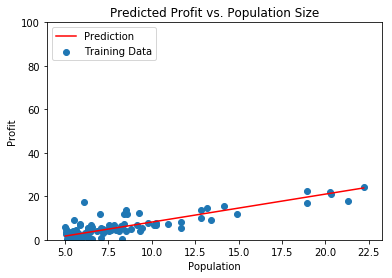

In [117]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = model.intercept_ + model.coef_*x

fig, ax = plt.subplots()  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Training Data')  

ax.set_ylim(0,100)
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  